# TD4 - Explainability AI

## Exercise 1

Team members: Léo, Santiago, Swan, Vincent, Vivien

## Exercise 2

For our dataset, we found one named 90,000+ Cars Data From 1970 to 2024 on Kaggle. The columns it contains are: 
- Model: The model of the car.
- Year: The manufacturing year of the car.
- Price: The price of the car.
- Transmission: The type of transmission used in the car.
- Mileage: The mileage of the car.
- FuelType: The type of fuel used by the car.
- Tax: The tax rate applicable to the car.
- MPG: The miles per gallon efficiency of the car.
- EngineSize: The size of the car's engine.
- Manufacturer: The manufacturer of the car.

Our plan is to use the rest of the columns to predict the price of cars.

## Exercise 3

### Data Preprocessing

We'll start by loading our dataset using pandas.

In [10]:
import pandas as pd

df = pd.read_csv('CarsData.csv', sep=',')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


Next, we check the data's structure.

In [11]:
print(f'Data shape:\n{df.shape}\n')
print(f'Data columns:\n{df.columns}\n')
print(f'Data types:\n{df.dtypes}')

Data shape:
(97712, 10)

Data columns:
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')

Data types:
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
Manufacturer     object
dtype: object


Now we must check for nulls values.

In [12]:
print(f'Null values:\n{df.isnull().sum()}')

Null values:
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64


We appear to have no null values. Now we must check for data errors and inconsistencies.

In [13]:
# Set correct names for manufacturers
df['Manufacturer'] = df['Manufacturer'].replace('hyundi', 'hyundai')

# Set consistent format for all manufacturers
df['Manufacturer'] = df['Manufacturer'].str.title()

print(f'Unique manufacturers:\n{df["Manufacturer"].unique()}')

Unique manufacturers:
['Hyundai' 'Volkswagen' 'Bmw' 'Skoda' 'Ford' 'Toyota' 'Merc' 'Vauxhall'
 'Audi']


In [14]:
# Remove spaces before and after the model name
df['model'] = df['model'].str.strip()

# Set consistent format for all models
df['model'] = df['model'].str.title()

print(f'Unique models:\n{df["model"].unique()}')

Unique models:
['I10' 'Polo' '2 Series' 'Yeti Outdoor' 'Fiesta' 'C-Hr' 'Kuga' 'Tiguan'
 'A Class' '1 Series' 'Up' 'Golf' 'Corsa' 'Rav4' 'Gla Class' 'Aygo' 'Q5'
 'Karoq' 'Scala' 'Auris' 'Tucson' 'A4' 'Viva' 'Kodiaq' 'C Class' 'Mondeo'
 'Citigo' 'Yaris' 'X4' 'Octavia' 'Astra' 'Focus' '3 Series' 'Glc Class'
 'Q3' 'B-Max' 'C-Max' 'Ix20' 'X5' 'T-Cross' 'Shuttle' 'Insignia' 'Zafira'
 'A3' 'A5' 'Sl Class' 'Ecosport' 'X1' 'Fabia' 'Golf Sv' 'Verso' 'Yeti'
 'Mokka X' 'Antara' 'E Class' '4 Series' 'Superb' '5 Series' '8 Series'
 'B Class' 'Ka+' 'X2' 'Gle Class' 'A6' 'Mokka' 'Passat' 'Kamiq' 'Adam'
 'Q7' 'Tiguan Allspace' 'X3' 'A1' 'Grandland X' 'Meriva' 'Tourneo Connect'
 'Arteon' 'Tt' 'Gls Class' 'Santa Fe' 'I30' 'S Class' 'Ioniq' 'Edge'
 'S-Max' 'Slk' 'Crossland X' '7 Series' 'T-Roc' 'Q2' 'Cl Class'
 'Cla Class' '6 Series' 'V Class' 'Scirocco' 'I3' 'Grand C-Max' 'Sq5' 'X7'
 'Corolla' 'A7' 'Touareg' 'Cls Class' 'I20' 'M Class' 'Prius' 'Ka' 'Gt86'
 'Hilux' 'Galaxy' 'M4' 'I800' 'Kona' 'Touran' 'Gr

Our data is now cleaned and consistent accross all columns.

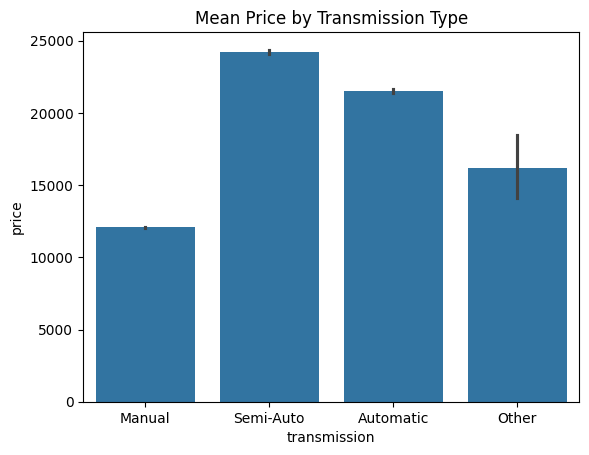

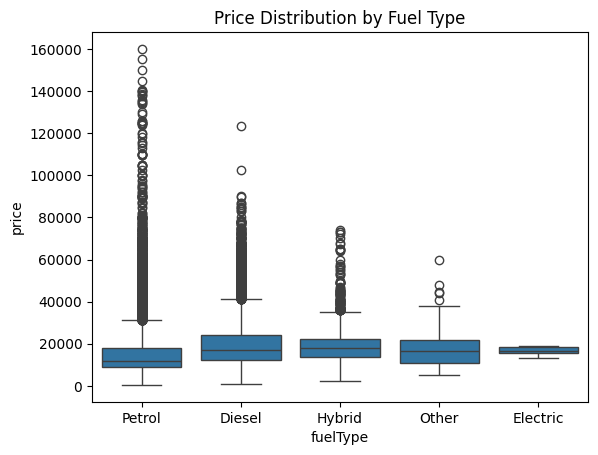

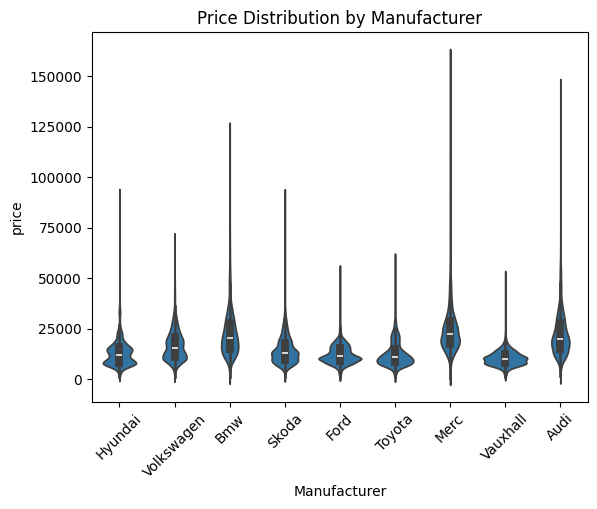

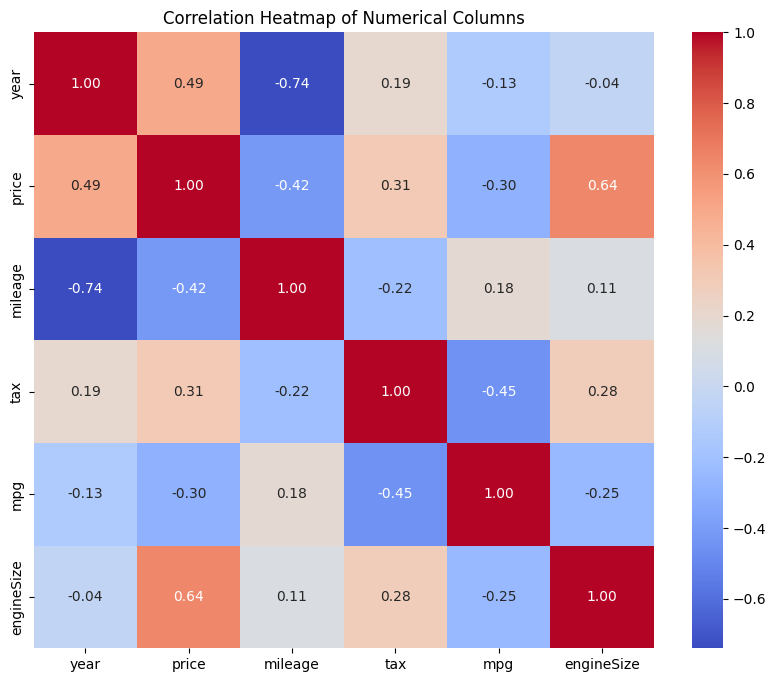

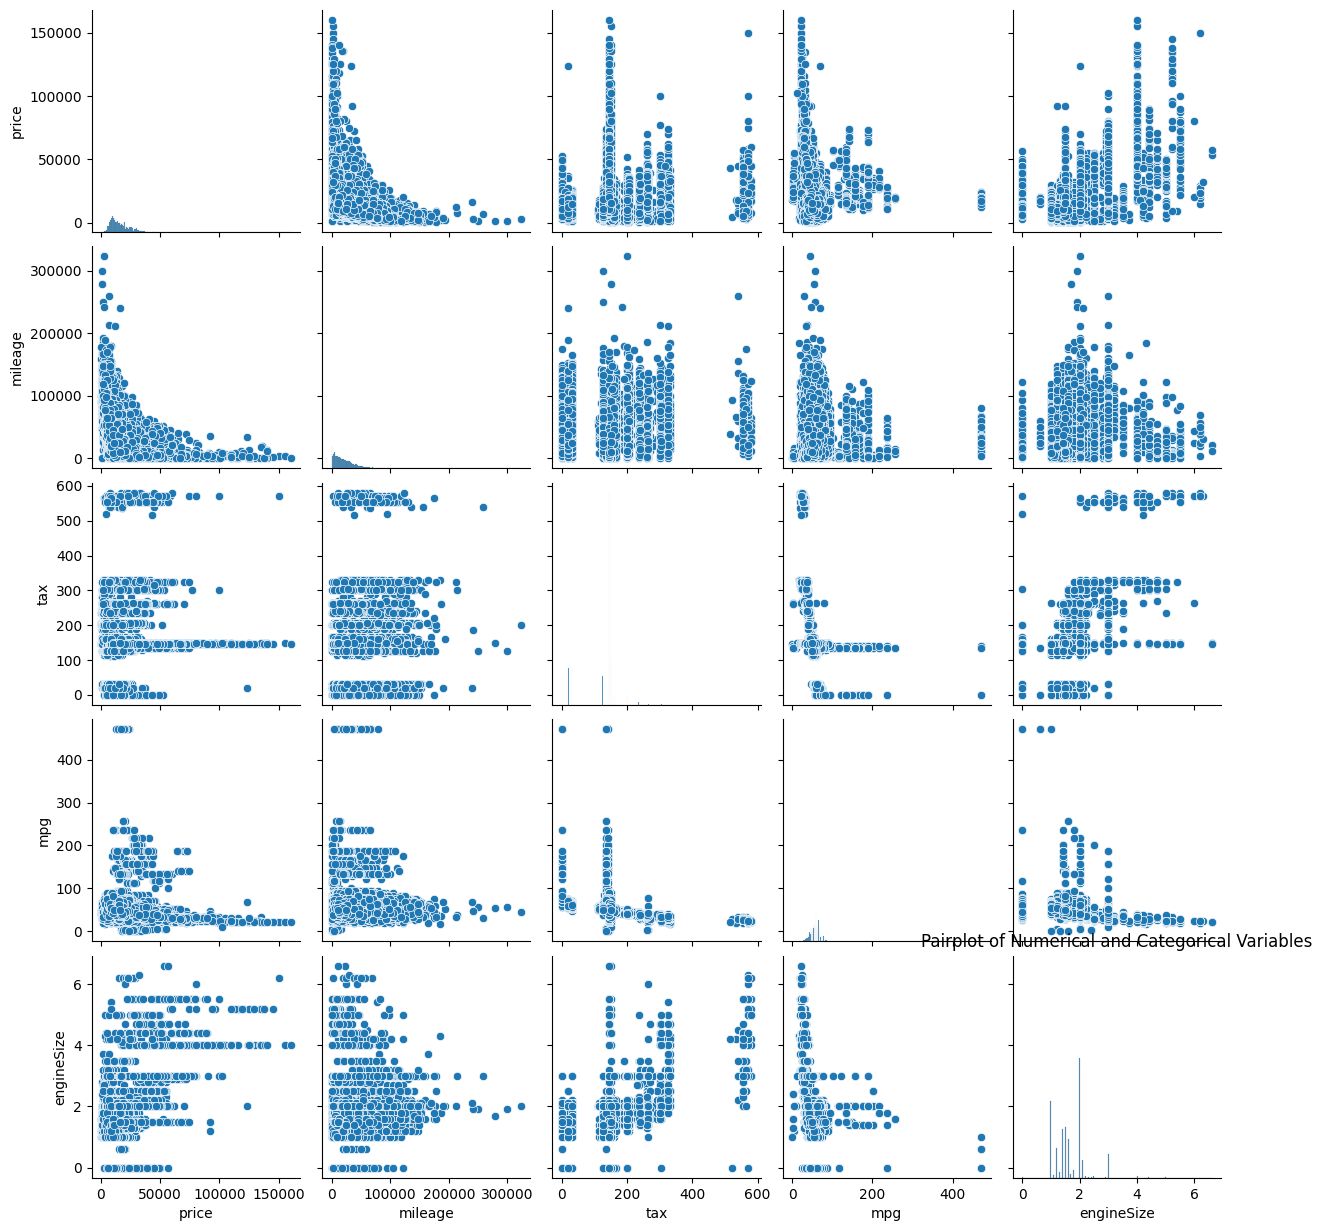

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of mean price by transmission type
sns.barplot(x='transmission', y='price', data=df)
plt.title('Mean Price by Transmission Type')
plt.show()

# Box plot of price distribution by fuel type
sns.boxplot(x='fuelType', y='price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.show()

# Violin plot of price distribution by manufacturer
sns.violinplot(x='Manufacturer', y='price', data=df)
plt.title('Price Distribution by Manufacturer')
plt.xticks(rotation=45)
plt.show()

# Select numerical columns
numerical_columns = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

# Calculate correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


# Pairplot of numerical and categorical variables
sns.pairplot(df[['price', 'mileage', 'tax', 'mpg', 'engineSize', 'transmission', 'fuelType', 'Manufacturer']])
plt.title('Pairplot of Numerical and Categorical Variables')
plt.show()


## Question 4
### Encoding

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
columns_one_hot = ['model','Manufacturer','transmission','fuelType']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Loop through each diagnosis column
for column in columns_one_hot:
    # Fit and transform the diagnosis column
    column_encoded = onehot_encoder.fit_transform(df[[column]])

    # Create a DataFrame with the encoded columns
    encoded_df = pd.DataFrame(column_encoded, columns=onehot_encoder.get_feature_names_out([column]))

    # Reset the index of the original data
    df.reset_index(drop=True, inplace=True)

    # Concatenate the original data with the encoded columns
    df = pd.concat([df, encoded_df], axis=1)

# Drop the original diagnosis columns
df= df.drop(columns_one_hot, axis=1)

In [96]:
df.head()


,year,price,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,Manufacturer_toyota,Manufacturer_vauxhall,Manufacturer_volkswagen,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,7495,11630,145,60.1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2017,10989,9200,145,58.9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2019,27990,1614,145,49.6,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2017,12495,30960,150,62.8,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,7999,19353,125,54.3,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.drop('columns=')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separate features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Interpret coefficients
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
print(coefficients)

# Check for contradictory coefficients
# Compare coefficients with intuition and domain knowledge
# Look for coefficients that have unexpected signs or magnitudes


Mean Squared Error: 13843462.533786153
                    feature  coefficient
0                      year  1399.210299
1                   mileage    -0.089261
2                       tax   -11.227937
3                       mpg   -83.220847
4                engineSize  6032.738883
..                      ...          ...
209  transmission_Semi-Auto   716.965185
210       fuelType_Electric   533.756983
211         fuelType_Hybrid  5630.642543
212          fuelType_Other  3477.492578
213         fuelType_Petrol  1446.979501

[214 rows x 2 columns]


From what we saw in the correlation matrix, it's logical that the engine size